# Introduction

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions__: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

__Description of fnlwgt (final weight)__ 

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are__:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Relevant papers
Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers__: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996. (PDF)

## Column Description

- ____age____: numerical values.
- ____workclass____: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- __fnlwgt__: numerical values.
- __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- __education-num__: numerical values.
- __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- __sex__: Female, Male.
- __capital-gain__: numerical values.
- __capital-loss__: numerical values.
- __hours-per-week__: numerical values.
- __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Task

Build a model that predicts whether a person has an income above 50k.

### Task Details
In this task, we will need to solve the classification problem (whether a person has a return above 50k or not - __0 or 1). It is necessary to select the most significant features

### Expected Submission
At the output, the algorithm should output 0 - __the yield is lower than or equal to 50k, or 1 - __the yield is higher than 50k.

# Preprocessing Data

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Import Dataset

In [2]:
data = pd.read_csv('C:/Users/Acer/Downloads/Dataset_DataScience/EDA/Salary/adult.csv', na_values = '?')
data.head(50)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


## Check Info Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.shape

(32561, 15)

In [5]:
# Change values in the income column with certain integer values
data['income'] = data['income'].replace(['<=50K', '>50K'],[0,1]).astype(int)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


## Handling Missing Data

In [6]:
# Checking the number of missing data in each column
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
# Replace NaN with "unknown". 
data['workclass'].fillna('unknown', inplace = True)
data['occupation'].fillna('unknown', inplace = True)
data['native.country'].fillna('unknown', inplace = True)
print(data.isna().sum())
print(data.shape)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
(32561, 15)


# Data Exploration

## Corellation Data

In [8]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


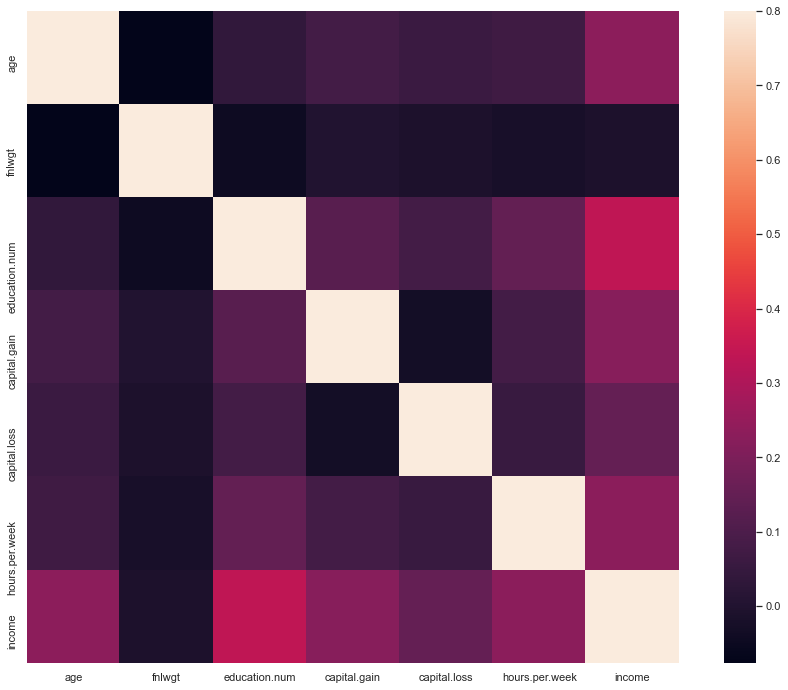

In [9]:
data_corr1 = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(data_corr1, vmax=.8, square=True);

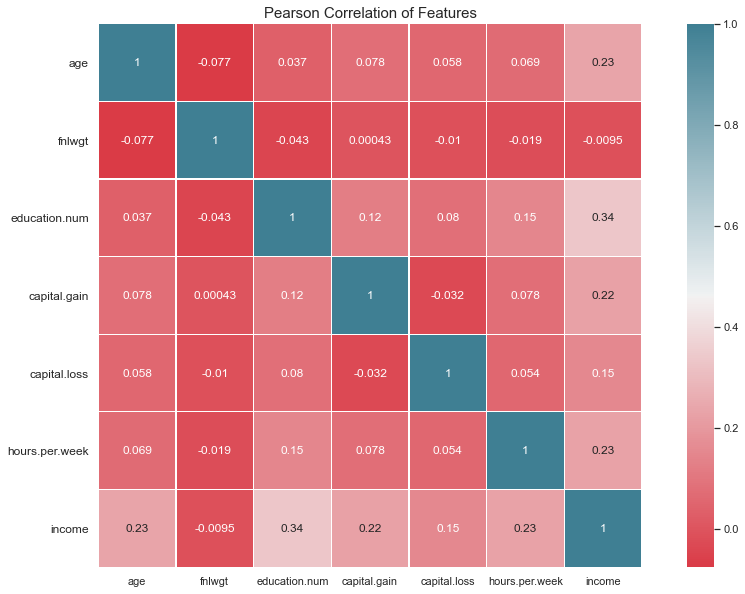

In [10]:
plt.figure(figsize=(16,10))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
g = sns.heatmap(data.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)
plt.show()

In [11]:
data.corr()["income"].sort_values()

fnlwgt           -0.009463
capital.loss      0.150526
capital.gain      0.223329
hours.per.week    0.229689
age               0.234037
education.num     0.335154
income            1.000000
Name: income, dtype: float64

From diagram we know that the "income" column has relation with these features:
1. education.num
2. age
3. hours.per.week
4. capital.gain
5. capital.loss

<Figure size 432x288 with 0 Axes>

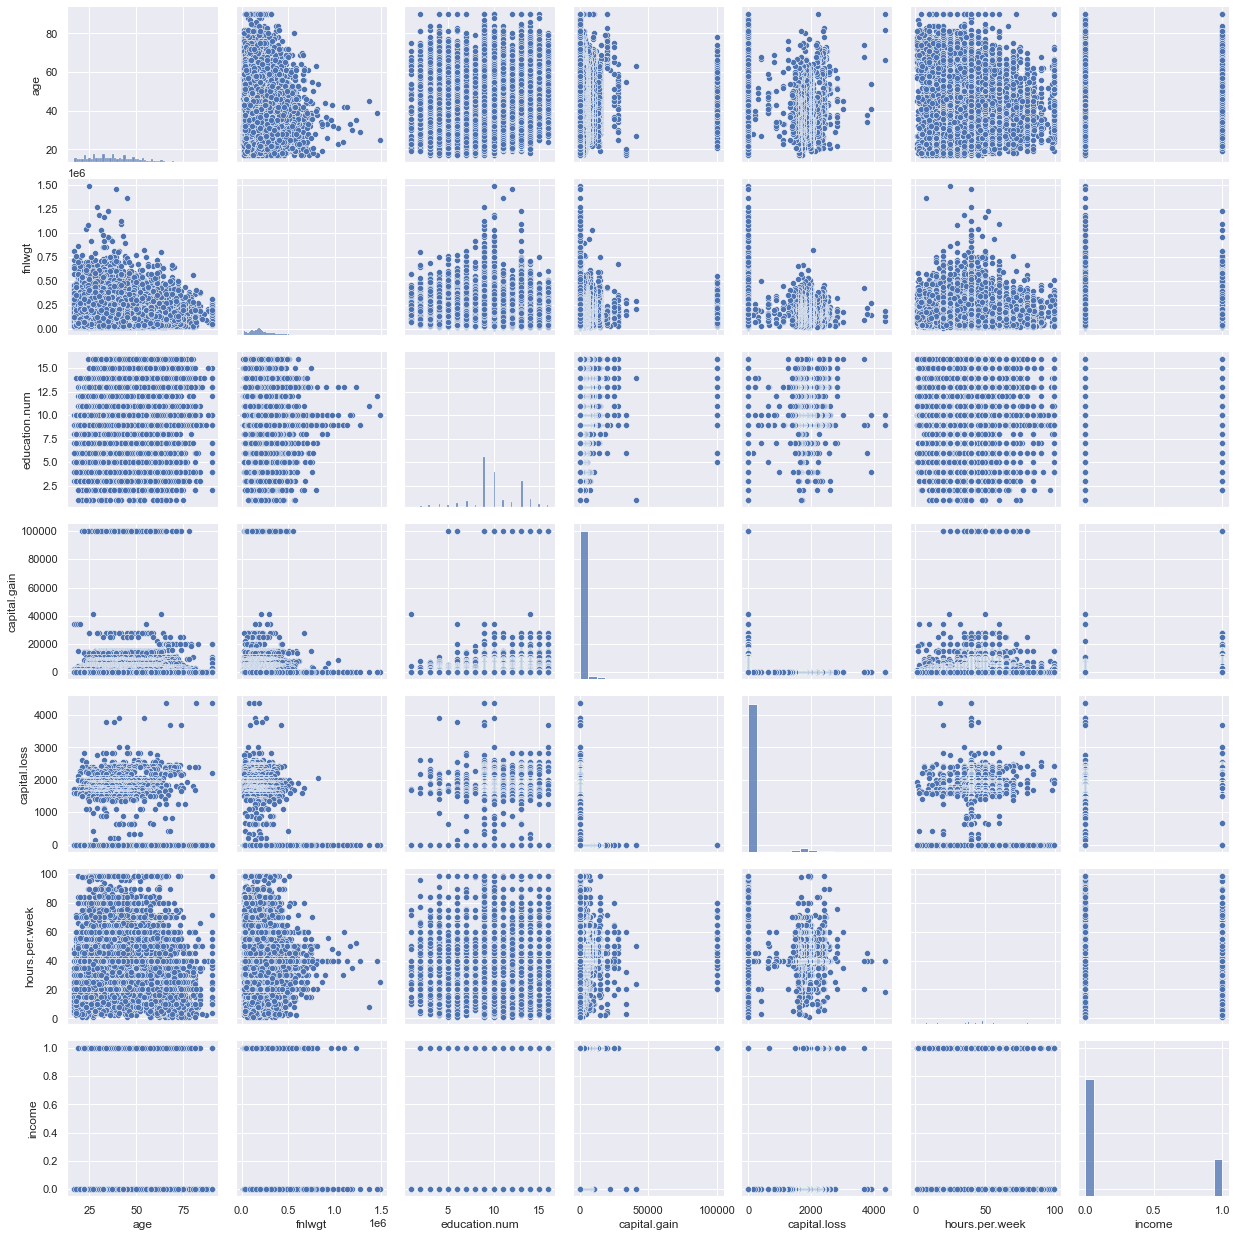

In [12]:
plt.figure()
sns.pairplot(data)
plt.show()

In [13]:
print("\n Data Exploration by checking the label distribution using grouby and size function")
data.groupby('income').size()


 Data Exploration by checking the label distribution using grouby and size function


income
0    24720
1     7841
dtype: int64

## Data Visualization

### Categorical Data
#### Income vs 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'

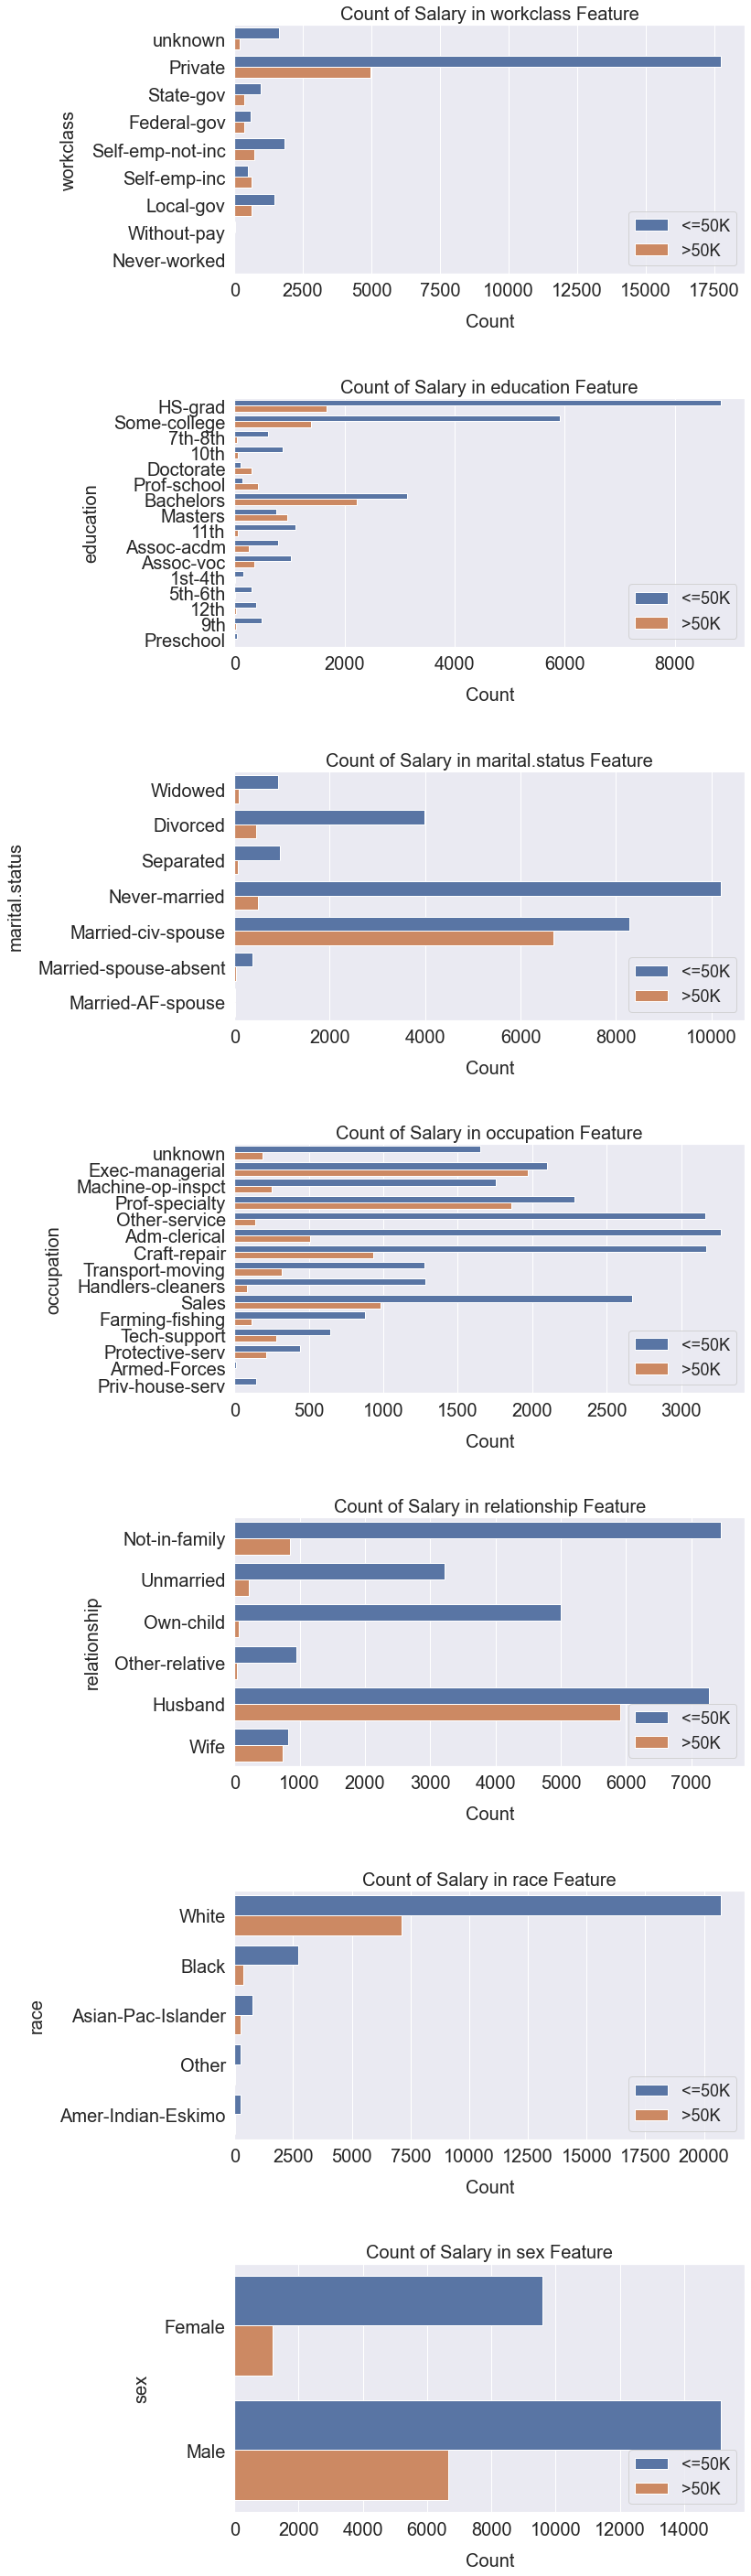

In [14]:
features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'] 

fig, axs = plt.subplots(ncols=1, nrows=7, figsize=(10, 50))

for i, feature in enumerate(features, 1):    
    plt.subplot(7, 1, i)
    sns.countplot(y=feature, hue='income', data=data)
    
    plt.ylabel('{}'.format(feature), size=20, labelpad=15)
    plt.xlabel('Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['<=50K', '>50K'], loc='lower right', prop={'size': 18})
    plt.title('Count of Salary in {} Feature'.format(feature), size=20)
    fig.subplots_adjust(hspace=.5)

plt.show()

In [15]:
data = data.rename(columns={'native.country': 'country'})

data.country.value_counts(normalize=False)

United-States                 29170
Mexico                          643
unknown                         583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

Text(0, 0.5, 'Count')

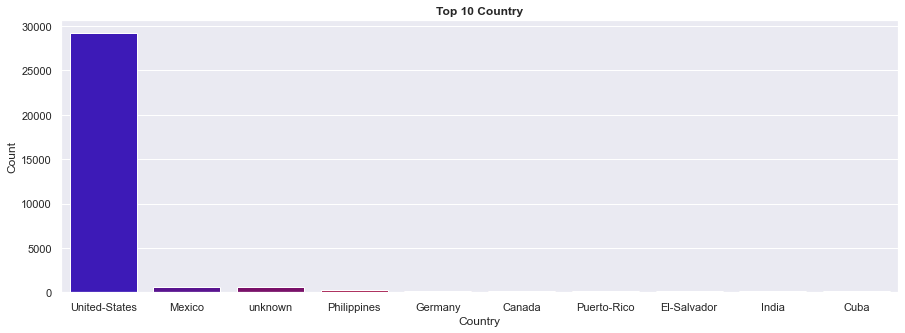

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='country', data=data, 
              order=pd.value_counts(data['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

## Numerical Data
### Proportion of Income

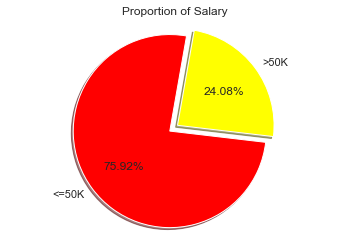

In [17]:
labels = ['<=50K', '>50K']

salary_data = data['income'].value_counts()
my_colors = ['red','Yellow']
my_explode = (0, 0.1)
plt.pie(salary_data, labels=labels, autopct='%.2f%%', startangle=80, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Proportion of Salary')
plt.axis('equal')
plt.show()

### Distribution of Age Column

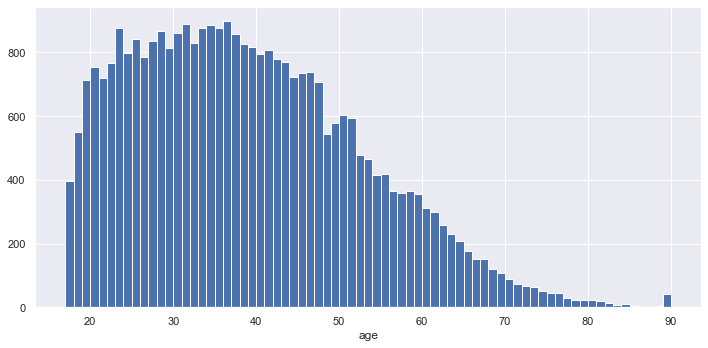

In [18]:
# Seting: matplotlib and seaborn
#sns.set_style('whitegrid')  
#plt.style.use('fivethirtyeight')

#make a histogram for "age" column
plt.figure(figsize=(10, 5))
plt.hist(data['age'], bins = data.age.nunique())
plt.xlabel('age')
plt.tight_layout()
plt.show()

In [19]:
print("Minimum Age = {}\n".format(data['age'].min()))
print("Maximum Age = {}\n".format(data['age'].max()))

Minimum Age = 17

Maximum Age = 90



### Income vs Ages

In [20]:
# We can divided Age into several groups

working_age = data[data['age'] < 25]
prime_working_age = data[(data["age"] >= 25) & (data["age"] < 55)]
retirement_working_age = data[data["age"] >= 55]

In [21]:
# calculates income according to age groups
working_age_income = working_age["income"].value_counts()
prime_working_age_income = prime_working_age["income"].value_counts()
retirement_working_age_income = retirement_working_age["income"].value_counts()

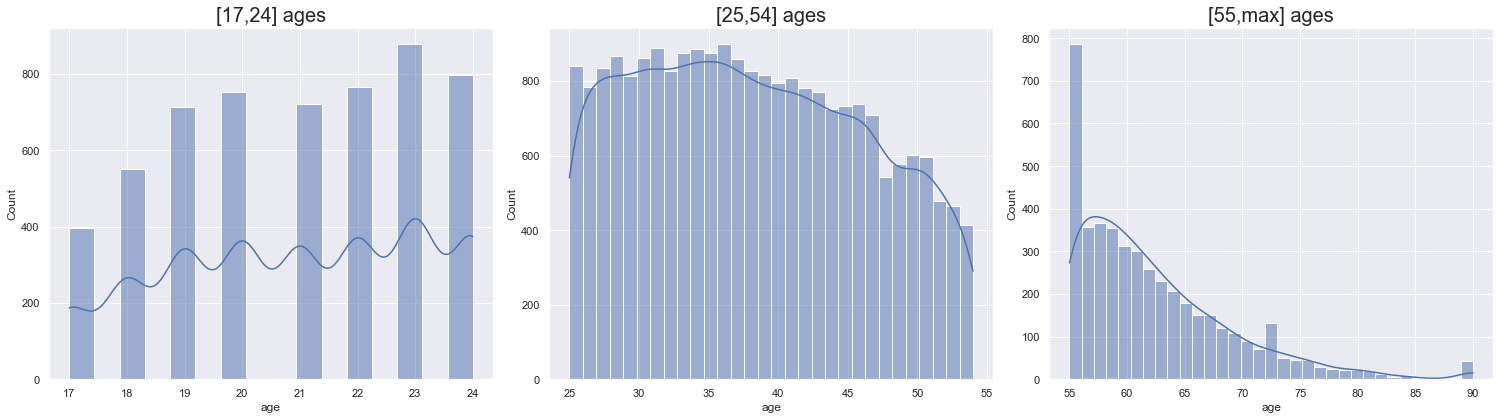

In [22]:
# hist plot for each lead time group
fig, (bx1, bx2, bx3) = plt.subplots(1,3,figsize=(21,6))
sns.histplot(working_age["age"], ax = bx1, kde=True)
bx1.set_title("[17,24] ages", size=20)
sns.histplot(prime_working_age["age"], ax = bx2, kde=True)
bx2.set_title("[25,54] ages", size=20)
sns.histplot(retirement_working_age["age"], ax = bx3, kde=True)
bx3.set_title("[55,max] ages", size=20)
plt.tight_layout()
plt.show()

In [23]:
# total count of age according to the income
total_working_age_income = pd.DataFrame(data=[working_age_income,
                                              prime_working_age_income,retirement_working_age_income],
             index=["[17,24] ages", "[25,54] ages", "[55,max) ages"])
total_working_age_income

,0,1
"[17,24] ages",5509,61
"[25,54] ages",16005,6478
"[55,max) ages",3206,1302


### Income vs education.num, age, hours.per.week, capital.gain, capital.loss

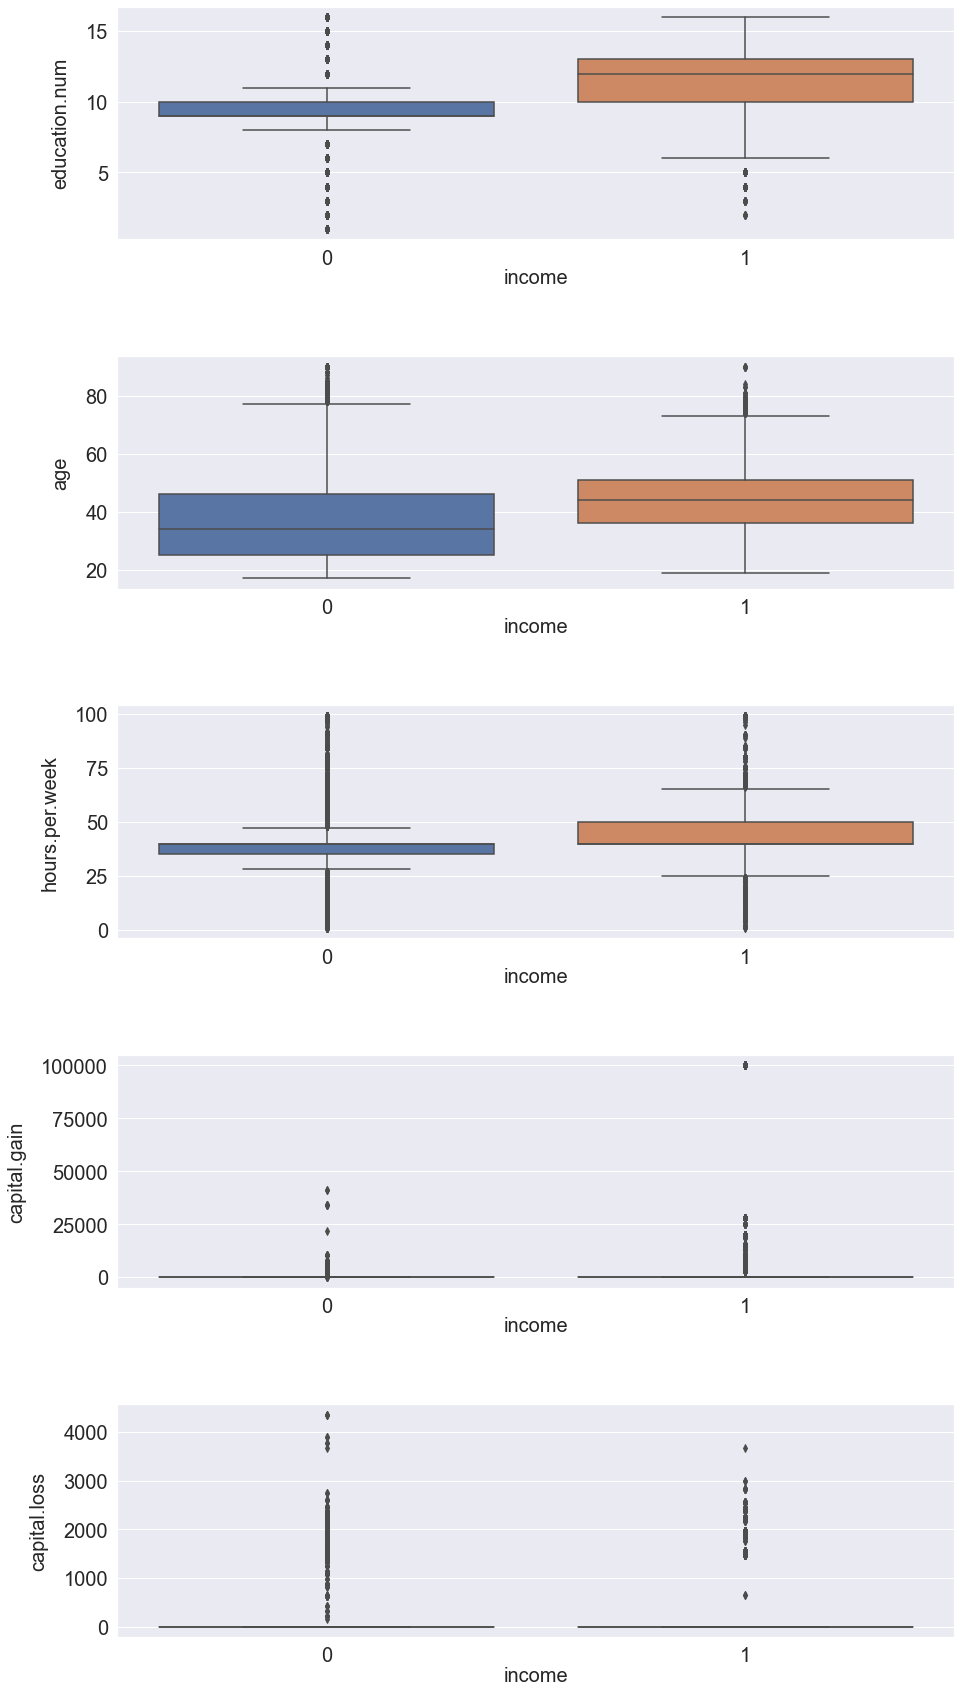

In [24]:
feature = ["education.num", "age", "hours.per.week", "capital.gain", "capital.loss"]

mylabels = ['<=50K', '>50K']
fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(15, 30))

for i, feature in enumerate(feature, 1):    
    plt.subplot(5, 1, i)
    #sns.countplot(y=feature, hue='Gaji', data=gaji_train)
    sns.boxplot(y=feature, x='income', data=data)
    
    plt.ylabel('{}'.format(feature), size=20, labelpad=15)
    plt.xlabel('income', size=20, labelpad=0)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    #plt.legend(['=<5 Juta', '>5 Juta'], loc='best', prop={'size': 15})
    #plt.title('Count of Salary in {} Feature'.format(feature), size=20)
    fig.subplots_adjust(hspace=.5)

plt.show()

# Data Modelling

## Standarization of Categorical Columns

In [25]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income
0,90,unknown,77053,HS-grad,9,Widowed,unknown,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,unknown,186061,Some-college,10,Widowed,unknown,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [26]:
from sklearn.preprocessing import LabelEncoder

# columns with dtype object
categorical_features = list(data.select_dtypes(include=['object']).columns)
#categorical_features.remove('')

# Label Encoder 
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    data[feature] = data[feature].astype(str)
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

In [27]:
data.corr()["income"].sort_values()

relationship     -0.250918
marital.status   -0.199307
workclass        -0.055124
fnlwgt           -0.009463
occupation        0.010802
country           0.023154
race              0.071846
education         0.079317
capital.loss      0.150526
sex               0.215980
capital.gain      0.223329
hours.per.week    0.229689
age               0.234037
education.num     0.335154
income            1.000000
Name: income, dtype: float64

In [28]:
salary = data[['occupation', 'country', 'race', 'education', 'capital.loss', 'sex',
              'capital.gain', 'hours.per.week', 'age', 'education.num', 'income']].copy()

salary.head()

,occupation,country,race,education,capital.loss,sex,capital.gain,hours.per.week,age,education.num,income
0,14,38,4,11,4356,0,0,40,90,9,0
1,3,38,4,11,4356,0,0,18,82,9,0
2,14,38,2,15,4356,0,0,40,66,10,0
3,6,38,4,5,3900,0,0,40,54,4,0
4,9,38,4,15,3900,0,0,40,41,10,0


In [29]:
from sklearn.model_selection import train_test_split

y = salary["income"]
X = salary.drop(["income"], axis=1)

In [30]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# checking the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print('Prosentase income at Training Data adalah:')
print(y_train.value_counts(normalize=True))
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print('Prosentase income at Testing Data adalah:')
print(y_test.value_counts(normalize=True))

Shape of X_train: (22792, 10)
Shape of y_train: (22792,)
Prosentase income at Training Data adalah:
0    0.758643
1    0.241357
Name: income, dtype: float64
Shape of X_test: (9769, 10)
Shape of y_test: (9769,)
Prosentase income at Testing Data adalah:
0    0.760467
1    0.239533
Name: income, dtype: float64


## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train, y_train)

print('Model Logistic Regression yang terbentuk adalah: \n', logreg)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
from sklearn.metrics import classification_report
##Training Model: Predict 
y_pred = logreg.predict(X_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     17291
           1       0.64      0.30      0.41      5501

    accuracy                           0.79     22792
   macro avg       0.72      0.62      0.64     22792
weighted avg       0.77      0.79      0.76     22792



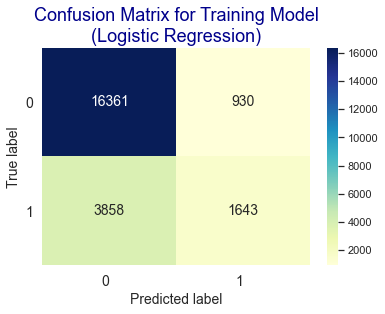

In [33]:
from sklearn.metrics import confusion_matrix

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_pred)), ('0', '1'), ('0', '1'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [34]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = logreg.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7429
           1       0.64      0.30      0.41      2340

    accuracy                           0.79      9769
   macro avg       0.73      0.62      0.64      9769
weighted avg       0.77      0.79      0.76      9769



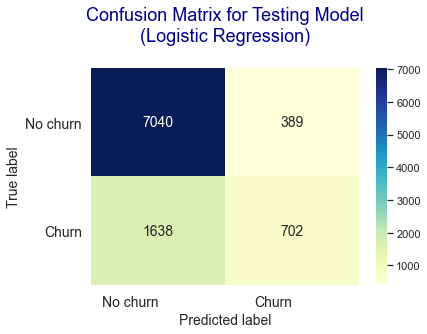

In [35]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc

# We can use the functions to apply the models and roc curves to save space.
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [37]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Model: Logistic Regression

Accuracy Score: 0.8237281195618794

Confusion Matrix:
 [[7104  325]
 [1397  943]]


In [38]:
cv_scores1 = cross_val_score(logreg, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV1: ', cv_scores1.mean())

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Mean Score of CV1:  0.7587652853496627


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


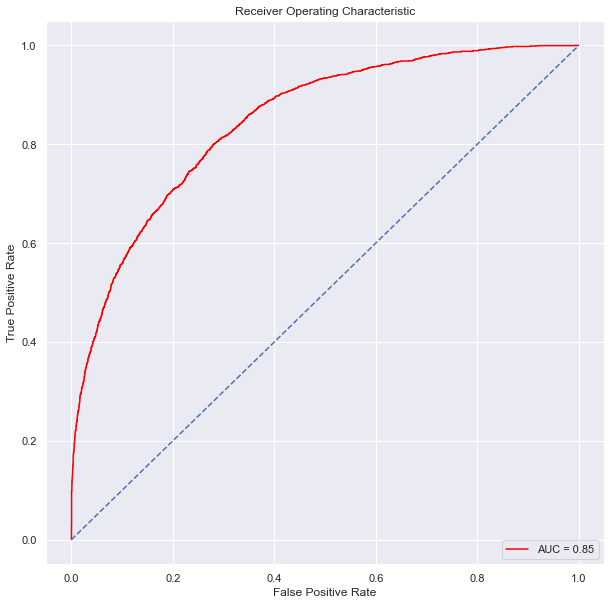

In [39]:
ROC(y_test, y_prob)

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(X_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [41]:
from sklearn.metrics import classification_report
y_train_pred = rdf_model.predict(X_train)
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17291
           1       0.94      0.87      0.90      5501

    accuracy                           0.95     22792
   macro avg       0.95      0.92      0.94     22792
weighted avg       0.95      0.95      0.95     22792



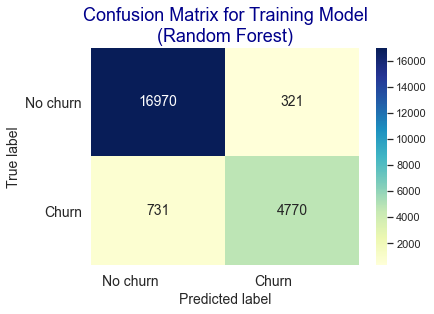

In [42]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [43]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = rdf_model .predict(X_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7429
           1       0.68      0.55      0.61      2340

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769



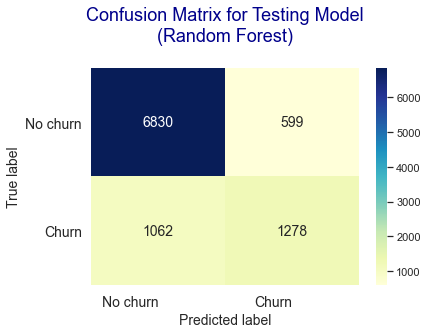

In [44]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [45]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8299723615518477

Confusion Matrix:
 [[6820  609]
 [1052 1288]]


In [46]:
cv_scores2 = cross_val_score(rdf_model, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV2: ', cv_scores2.mean())

Mean Score of CV2:  0.7814614985119774


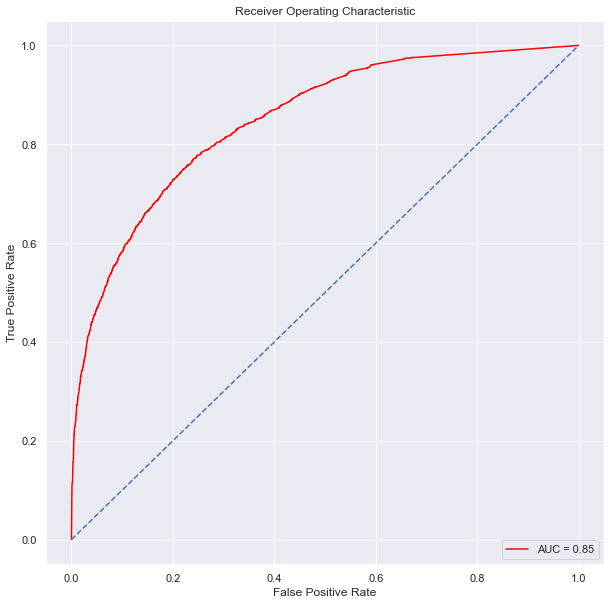

In [47]:
ROC(y_test, y_prob)

## GBoost

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(X_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


In [49]:
from sklearn.metrics import classification_report
# Predict
y_train_pred = gbt_model.predict(X_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     17291
           1       0.80      0.52      0.63      5501

    accuracy                           0.85     22792
   macro avg       0.83      0.74      0.77     22792
weighted avg       0.85      0.85      0.84     22792



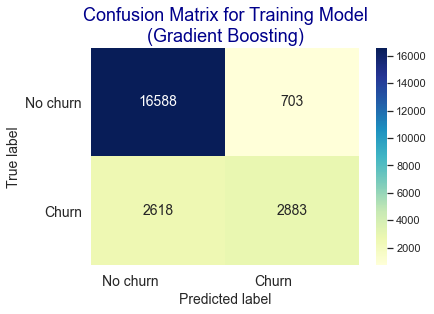

In [50]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [51]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = gbt_model.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7429
           1       0.80      0.52      0.63      2340

    accuracy                           0.85      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769



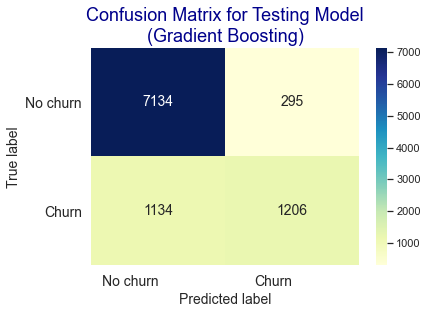

In [52]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [53]:
print('Model: GBoost\n')
model(GradientBoostingClassifier(), X_train, X_test, y_train, y_test)

Model: GBoost

Accuracy Score: 0.8537209540382844

Confusion Matrix:
 [[7134  295]
 [1134 1206]]


In [54]:
cv_scores3 = cross_val_score(gbt_model, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV3: ', cv_scores3.mean())

Mean Score of CV3:  0.8070748664521694


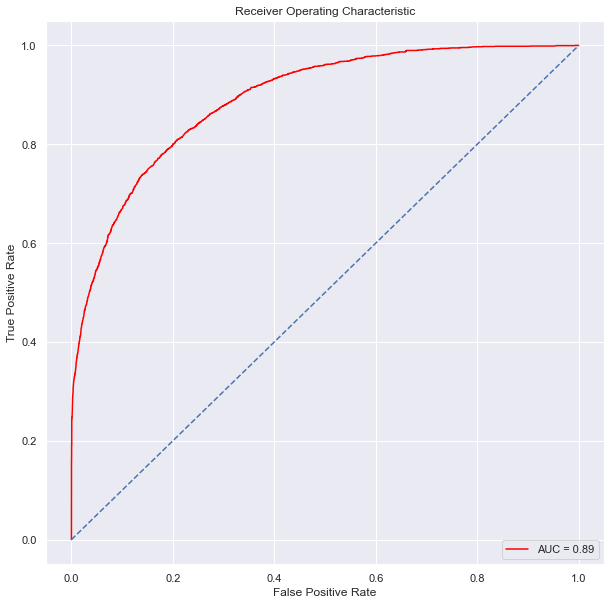

In [55]:
ROC(y_test, y_prob)

## KFold

In [56]:
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics

data["kfold"] = -1

# shuffling
data = data.sample(frac = 1).reset_index(drop = True)

# targets
target = data.income.values

# stratified k fold with 5 folds
kf = model_selection.StratifiedKFold(n_splits = 5)

for i, (train, val) in enumerate(kf.split(X = data, y = target)):
    data.loc[val, 'kfold'] = i

C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [57]:
data.kfold.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [58]:
def run(folds, model):

    # training and validation set
    df_train = data[data.kfold != folds].reset_index(drop = True)
    df_valid = data[data.kfold == folds].reset_index(drop = True)

    X_train = df_train.drop(columns = ['income']).values
    y_train = df_train.income.values

    X_valid = df_valid.drop(columns = ['income']).values
    y_valid = df_valid.income.values

    clf = models[model]

    print ("Training...")
    clf.fit(X_train, y_train)

    print ("Done!!")
    preds = clf.predict(X_valid)
        
    acc = metrics.accuracy_score(y_valid, preds)
    print ("Fold = {} Accuracy = {}".format(folds, acc))
    print ("------Classification Report")
    print (metrics.classification_report(y_valid, preds))

In [59]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# Models Trained + DNN
models = {
    'logistic_regression' : LogisticRegression(C = 1.2),
    'xgboost': XGBClassifier(eta = 0.35, max_depth = 12),
    'random_forest' :  RandomForestClassifier(n_estimators = 120)
    }

In [60]:
# 5 Folds -- Logistic Regression
for fold in range(0, 5):
    run(fold, 'logistic_regression')

Training...


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done!!
Fold = 0 Accuracy = 0.7879625364655305
------Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4944
           1       0.63      0.28      0.39      1569

    accuracy                           0.79      6513
   macro avg       0.72      0.62      0.63      6513
weighted avg       0.76      0.79      0.76      6513

Training...


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done!!
Fold = 1 Accuracy = 0.7954545454545454
------Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4944
           1       0.67      0.30      0.41      1568

    accuracy                           0.80      6512
   macro avg       0.74      0.63      0.64      6512
weighted avg       0.78      0.80      0.76      6512

Training...


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done!!
Fold = 2 Accuracy = 0.7871621621621622
------Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4944
           1       0.63      0.28      0.39      1568

    accuracy                           0.79      6512
   macro avg       0.72      0.61      0.63      6512
weighted avg       0.76      0.79      0.76      6512

Training...
Done!!
Fold = 3 Accuracy = 0.8037469287469288
------Classification Report
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      4944
           1       0.77      0.26      0.39      1568

    accuracy                           0.80      6512
   macro avg       0.79      0.62      0.64      6512
weighted avg       0.80      0.80      0.76      6512

Training...
Done!!
Fold = 4 Accuracy = 0.7916154791154791
------Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.87  

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
# 5 Folds -- XGBoost
for fold in range(0, 5):
    model = run(fold, 'xgboost')

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training...
[23:26:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Done!!
Fold = 0 Accuracy = 0.8535237217871948
------Classification Report
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4944
           1       0.72      0.64      0.68      1569

    accuracy                           0.85      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Training...
[23:26:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Done!!
Fold = 1 Accuracy = 0.859490171990172
------Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4944
           1       0.74      0.64      0.69      1568

    accuracy                           0.86      6512
   macro avg       0.82      0.79      0.80      6512
weighted avg       0.85      0.86      0.86      6512

Training...
[23:26:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Done!!
Fold = 2 Accuracy = 0.8593366093366094
------Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4944
           1       0.75      0.63      0.68      1568

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.80      6512
weighted avg       0.85      0.86      0.86      6512

Training...
[23:26:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Done!!
Fold = 3 Accuracy = 0.8622542997542998
------Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4944
           1       0.74      0.66      0.70      1568

    accuracy                           0.86      6512
   macro avg       0.82      0.79      0.80      6512
weighted avg       0.86      0.86      0.86      6512

Training...
[23:26:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Done!!
Fold = 4 Accuracy = 0.8607186732186732
------Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4944
           1       0.74      0.64      0.69      1568

    accuracy                           0.86      6512
   macro avg       0.82      0.79      0.80      6512
weighted avg       0.86      0.86      0.86      6512



In [62]:
# 5 Folds -- Random Forest
for fold in range(0, 5):
    run(fold, 'random_forest')

Training...
Done!!
Fold = 0 Accuracy = 0.8535237217871948
------Classification Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4944
           1       0.73      0.62      0.67      1569

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Training...
Done!!
Fold = 1 Accuracy = 0.8616400491400491
------Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4944
           1       0.77      0.61      0.68      1568

    accuracy                           0.86      6512
   macro avg       0.83      0.78      0.80      6512
weighted avg       0.86      0.86      0.86      6512

Training...
Done!!
Fold = 2 Accuracy = 0.8570331695331695
------Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94